In [1]:
from cohirf.experiment.hpo_classification_clustering_experiment import HPOClassificationClusteringExperiment
from pathlib import Path
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results_dir = Path("/home/belucci/code/cohirf/results") / "classification_samples"
mlflow_tracking_uri = f"sqlite:///{results_dir}/mlflow.db"

In [3]:
experiment_params = dict(
    profile_memory=False,
    mlflow_tracking_uri=None,
    check_if_exists=False,
	verbose=1,
)

# KMeans

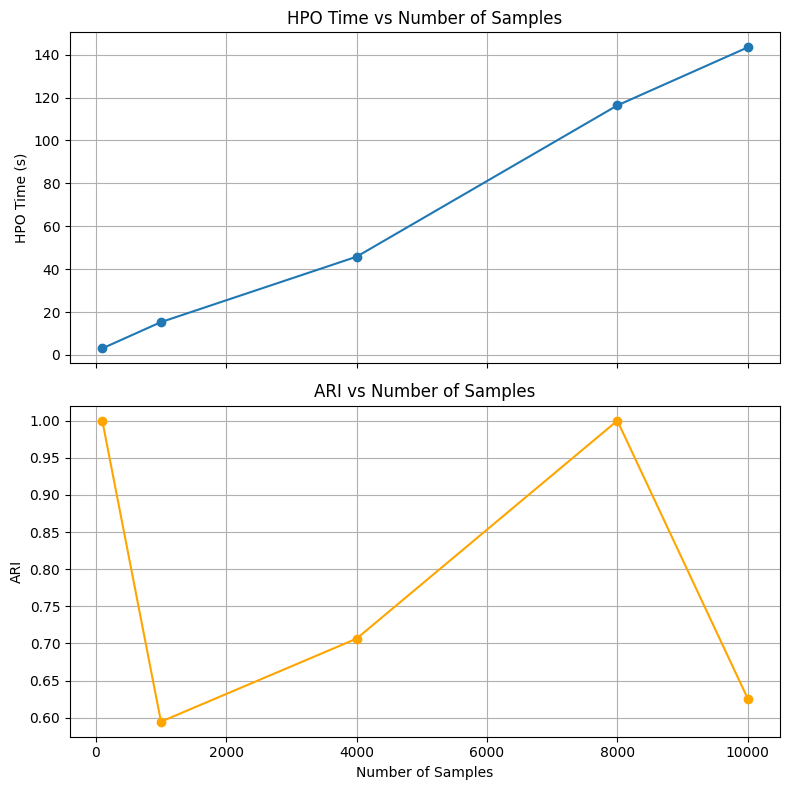

In [5]:
samples = [100, 1000, 4000, 8000, 10000]
aris = []
hpo_times = []
best_times = []
for n_samples in samples:
    n_informative = 10
    n_random = 10000#int(n_samples * 0.1)
    experiment = HPOClassificationClusteringExperiment(
        # hpo
        n_trials=20,
        hpo_seed=0,
        hpo_metric="adjusted_rand",
        direction="maximize",
        # model
        experiment_name="test",
        model="KMeans",
        seed_model=0,
        # dataset
        n_samples=n_samples,
        n_informative=n_informative,
        n_random=n_random,
        n_classes=3,
        class_sep=3 * (n_informative**0.5),
        seed_dataset=0,
        **experiment_params,
    )
    result = experiment.run(return_results=True)[0]
    ari = result["evaluate_model_return"]["best/adjusted_rand"]
    hpo_time = result["fit_model_return"]["elapsed_time"]
    best_time = result["evaluate_model_return"]["best/elapsed_time"]
    aris.append(ari)
    hpo_times.append(hpo_time)
    best_times.append(best_time)
clear_output(wait=True)
# plot results
df = pd.DataFrame(
    {
        "n_samples": samples,
        "ari": aris,
        "hpo_time": hpo_times,
        "best_time": best_times,
    }
)


fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Upper plot: hpo_time vs n_samples
axs[0].plot(df["n_samples"], df["hpo_time"], marker="o")
axs[0].set_ylabel("HPO Time (s)")
axs[0].set_title("HPO Time vs Number of Samples")
axs[0].grid(True)

# Lower plot: ari vs n_samples
axs[1].plot(df["n_samples"], df["ari"], marker="o", color="orange")
axs[1].set_xlabel("Number of Samples")
axs[1].set_ylabel("ARI")
axs[1].set_title("ARI vs Number of Samples")
axs[1].grid(True)

plt.tight_layout()
plt.show()